In [0]:
import numpy as np
import pandas as pd

In [0]:
# import data as a pandas dataframe
whisky = pd.read_csv('whiskies.txt')
whisky['Region'] = pd.read_csv('regions.txt')

In [18]:
whisky.head(5)

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands


In [19]:
whisky.tail(5)

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
81,82,Tobermory,1,1,1,0,0,1,0,0,1,2,2,2,PA75 6NR,150450,755070,Islands
82,83,Tomatin,2,3,2,0,0,2,2,1,1,2,0,1,IV13 7YT,279120,829630,Highlands
83,84,Tomintoul,0,3,1,0,0,2,2,1,1,2,1,2,AB37 9AQ,315100,825560,Speyside
84,85,Tormore,2,2,1,0,0,1,0,1,2,1,0,0,PH26 3LR,315180,834960,Speyside
85,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850,Highlands


In [20]:
whisky.iloc[45:50, 3:14]

,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
45,3,1,0,0,0,0,0,0,2,2,2
46,2,0,0,0,1,1,1,2,2,3,2
47,2,1,0,0,1,2,0,0,2,2,2
48,3,1,0,0,2,2,2,1,2,2,3
49,2,1,0,0,1,2,0,1,2,2,2


In [0]:
flavors = whisky.iloc[:, 2:14]

In [22]:
flavors

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
81,1,1,1,0,0,1,0,0,1,2,2,2
82,2,3,2,0,0,2,2,1,1,2,0,1
83,0,3,1,0,0,2,2,1,1,2,1,2
84,2,2,1,0,0,1,0,1,2,1,0,0


In [0]:
corr_flavors = pd.DataFrame.corr(flavors)

In [24]:
corr_flavors

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
Body,1.000000,-0.136518,0.524032,0.354050,0.168718,0.082031,0.188500,0.408576,0.126323,-0.116859,-0.013205,-0.461203
Sweetness,-0.136518,1.000000,-0.405897,-0.392017,-0.147871,0.132558,-0.054200,0.115727,-0.032493,-0.001516,0.019820,0.144987
Smoky,0.524032,-0.405897,1.000000,0.686071,0.365501,-0.195318,0.231745,-0.028190,-0.023132,-0.192875,-0.312970,-0.431663
Medicinal,0.354050,-0.392017,0.686071,1.000000,0.425106,-0.396629,0.044903,-0.202651,-0.113671,-0.258959,-0.330975,-0.511323
Tobacco,0.168718,-0.147871,0.365501,0.425106,1.000000,-0.275490,0.054068,0.009097,-0.117717,-0.059347,-0.235145,-0.212375
Honey,0.082031,0.132558,-0.195318,-0.396629,-0.275490,1.000000,0.139563,0.362021,0.188492,0.310184,0.108822,0.183029
Spicy,0.188500,-0.054200,0.231745,0.044903,0.054068,0.139563,1.000000,0.092704,-0.042856,0.036303,0.144714,0.034663
Winey,0.408576,0.115727,-0.028190,-0.202651,0.009097,0.362021,0.092704,1.000000,0.198467,0.112368,0.090694,-0.126932
Nutty,0.126323,-0.032493,-0.023132,-0.113671,-0.117717,0.188492,-0.042856,0.198467,1.000000,0.066157,0.071765,0.018302
Malty,-0.116859,-0.001516,-0.192875,-0.258959,-0.059347,0.310184,0.036303,0.112368,0.066157,1.000000,0.207288,0.106309


In [0]:
import matplotlib.pyplot as plt

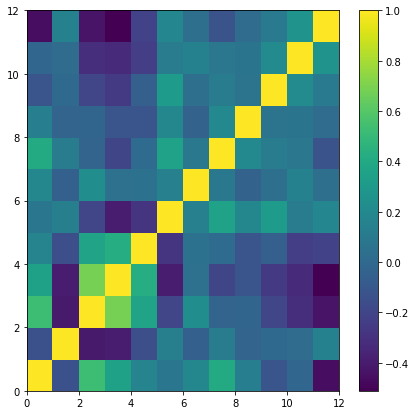

In [26]:
plt.figure(figsize=(7,7))
plt.pcolor(corr_flavors)
plt.colorbar()
plt.savefig("corr_flavors.pdf")

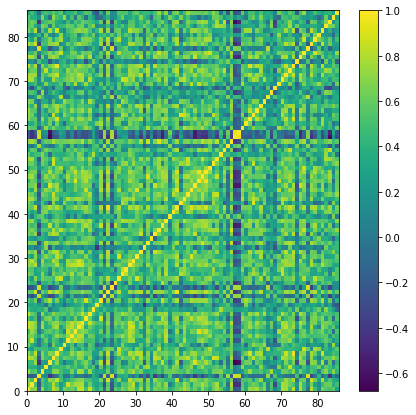

In [27]:
corr_whisky = pd.DataFrame.corr(flavors.transpose())
plt.figure(figsize=(7,7))
plt.pcolor(corr_whisky)
plt.colorbar()
plt.axis("tight")
plt.savefig("corr_whisky.pdf")

In [0]:
from sklearn.cluster.bicluster import SpectralCoclustering 

In [0]:
model = SpectralCoclustering(n_clusters= 6, random_state= 0)

In [30]:
model.fit(corr_whisky)

SpectralCoclustering(init='k-means++', mini_batch=False, n_clusters=6,
                     n_init=10, n_jobs=None, n_svd_vecs=None, random_state=0,
                     svd_method='randomized')

In [31]:
model.rows_

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False,  True, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False,  True, False, False, False,
        False, False,  True, False,  True, False, False,  True, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True, False,
        False, False,  True, Fals

In [32]:
np.sum(model.rows_, axis= 1)

array([ 5, 20, 19,  6, 19, 17])

In [33]:
np.sum(model.rows_, axis=0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [34]:
model.row_labels_

array([2, 4, 5, 3, 2, 1, 5, 4, 2, 5, 4, 1, 2, 1, 2, 2, 1, 2, 1, 0, 5, 3,
       5, 3, 5, 5, 4, 4, 5, 4, 5, 2, 1, 1, 1, 2, 4, 5, 1, 0, 1, 5, 4, 4,
       4, 1, 2, 1, 1, 5, 5, 4, 4, 4, 1, 0, 2, 3, 3, 1, 5, 2, 4, 2, 2, 4,
       0, 2, 0, 1, 4, 2, 1, 2, 4, 2, 5, 3, 2, 5, 1, 5, 4, 1, 4, 1],
      dtype=int32)

In [0]:
whisky['Group']= pd.Series(model.row_labels_, index= whisky.index)

In [0]:
whisky= whisky.iloc[np.argsort(model.row_labels_)]

In [0]:
whisky= whisky.reset_index(drop= True)

In [0]:
correlations= pd.DataFrame.corr(whisky.iloc[:,2:14].transpose())
correlations= np.array(correlations)

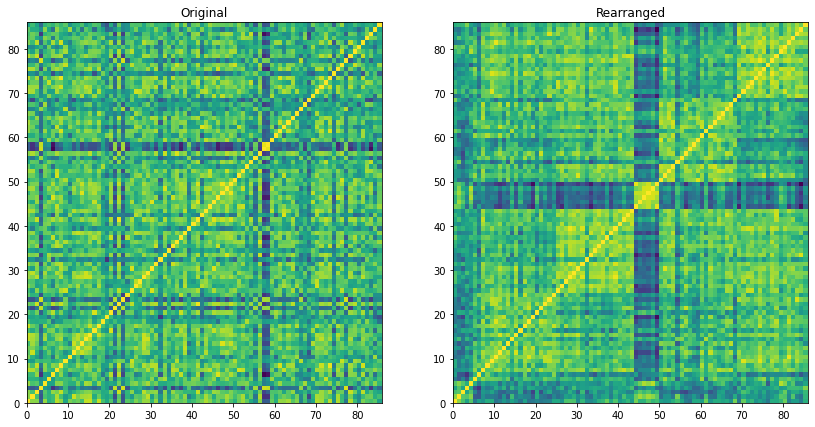

In [39]:
plt.figure(figsize= (14,7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title("Original")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearranged")
plt.axis("tight")
plt.savefig("correlations.pdf")